In [2]:
import pandas as pd
import re
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
num_df = pd.read_csv('../csvs/num_df.csv')
i_count = pd.read_csv('../csvs/i_count.csv').reset_index()
num_df['i_count'] = i_count
target_df = pd.read_csv('../csvs/target_df.csv')

In [18]:
num_df = pd.read_csv('../csvs/tal_numeric_df.csv')
sample_df = num_df.sample(50)

y = sample_df['Episode']
X = sample_df.drop(['Episode', 'Unnamed: 0'], axis=1)

In [19]:
X.shape
y.shape

(50, 24)

(50,)

In [ ]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)


lr_model = LogisticRegression() # initialize model
lr_model.fit(X_train, y_train) # train model
y_pred = lr_model.predict(X_test) # save model predictions of test data

plot_cm(y_test, y_pred, 'Logistic Regression: Tag 2', sorted(set(y.values)))

,Unnamed: 0,Speech_len,Avg_token_length,Longest_token,TTR,Avg_kband,Noun_freq,Proper_noun_freq,Verb_freq,Adj_freq,...,Avg_verb_len,Avg_adj_len,Avg_adv_len,i_count,you_count,she_count,he_count,it_count,they_count,we_count
0,0,8076,4.031851,13,0.508264,1.606878,13.273400,1.110524,12.004231,4.759387,...,4.088629,6.732049,5.039460,26.845638,29.530201,1.342282,19.463087,8.053691,0.671141,14.093960
1,1,9696,4.140135,14,0.609375,1.973834,17.415215,1.099908,10.907424,5.178735,...,3.869689,4.472482,4.293559,10.000000,18.000000,0.666667,22.000000,23.333333,22.666667,3.333333
2,2,8786,4.128544,12,0.602620,1.964690,14.527845,2.130751,11.283293,4.842615,...,3.204663,5.301444,3.600908,30.555556,25.694444,8.333333,1.388889,13.194444,9.027778,11.805556
3,3,1366,4.038911,12,0.780220,1.797521,21.269841,1.904762,11.111111,3.174603,...,7.290375,4.130859,3.883057,33.333333,33.333333,5.555556,5.555556,16.666667,0.000000,5.555556
4,4,4780,4.200918,15,0.521912,1.836710,17.188984,2.279202,11.016144,5.223172,...,7.565390,4.653786,3.258501,11.864407,23.728814,0.000000,16.949153,15.254237,8.474576,23.728814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,727,8451,4.390128,14,0.634241,2.089880,19.265033,2.060134,11.469933,5.734967,...,4.471215,4.798560,4.663576,6.896552,21.839080,13.793103,21.839080,20.689655,5.747126,9.195402
715,728,8609,4.272846,15,0.542222,1.911005,18.563188,2.936550,10.959622,3.828002,...,4.438583,4.739669,4.761780,11.363636,15.909091,5.681818,22.727273,30.681818,10.227273,3.409091
716,731,13374,4.446062,14,0.593750,1.832174,20.870817,1.583303,11.478949,7.052897,...,4.287314,4.967509,5.082562,7.812500,11.718750,10.937500,15.625000,17.187500,32.031250,4.687500
717,732,5051,4.182410,15,0.573705,1.847363,21.119134,1.624549,11.191336,4.422383,...,4.584250,4.767932,4.783387,6.666667,15.000000,21.666667,13.333333,21.666667,8.333333,13.333333


0        1
1        2
2        3
3        4
4        5
      ... 
714    730
715    731
716    734
717    735
718    736
Name: Episode, Length: 719, dtype: int64

In [3]:
print(num_df.columns)
print(target_df.columns)

Index(['podcast', 'Hosts', 'Rating', 'Token_count', 'Avg_token_len',
       'Avg_sent_len', 'TTR', 'Avg_kband', 'Noun_freq', 'Proper_noun_freq',
       'Verb_freq', 'Adj_freq', 'Adv_freq', 'Interjection_freq',
       'Preposition_freq', 'Conjunction_freq', 'Avg_noun_len', 'Avg_verb_len',
       'Avg_adj_len', 'Avg_adv_len', 'i_count', 'you_count', 'she_count',
       'he_count', 'it_count', 'they_count', 'we_count', 'Know', 'Be', 'Do',
       'Mean', 'Make', 'Go', 'Organization', 'Art', 'Date', 'Geopolitical',
       'Numbers', 'Event', 'Cash', 'Time', 'Product', 'period_freq',
       'excl_freq', 'quest_freq', 'hyph_freq', 'Tag_len', 'Swear_count',
       'Fake_swear_count', 'Opinion_count', 'Prep_per_sent', 'Donation_appeal',
       'Social'],
      dtype='object')
Index(['podcast', 'Hosts', 'Scripted/Un', 'Fiction/Non', 'Format', 'Rating',
       'Year', 'Tag1', 'Tag2'],
      dtype='object')


In [4]:
# function to show confusion matrix
def plot_cm(y_test, y_pred, model_name, ticks):
    fig, ax = plt.subplots(figsize=(10,10))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, square=True, annot=True, fmt='d', cmap='Blues',
                xticklabels=ticks, yticklabels=ticks, ax=ax)
    plt.xlabel('predicted label')
    plt.ylabel('true label')
    save_path = '../figures/non-lexical_features/' + model_name +'.pdf'
    fig.savefig(save_path)
    plt.title(f'{model_name} accuracy: {accuracy_score(y_test, y_pred)*100:0.4f}%'.format(model_name, accuracy_score(y_test, y_pred)))
    plt.show()

### Test #1: Using numerical features to predict Podcast

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

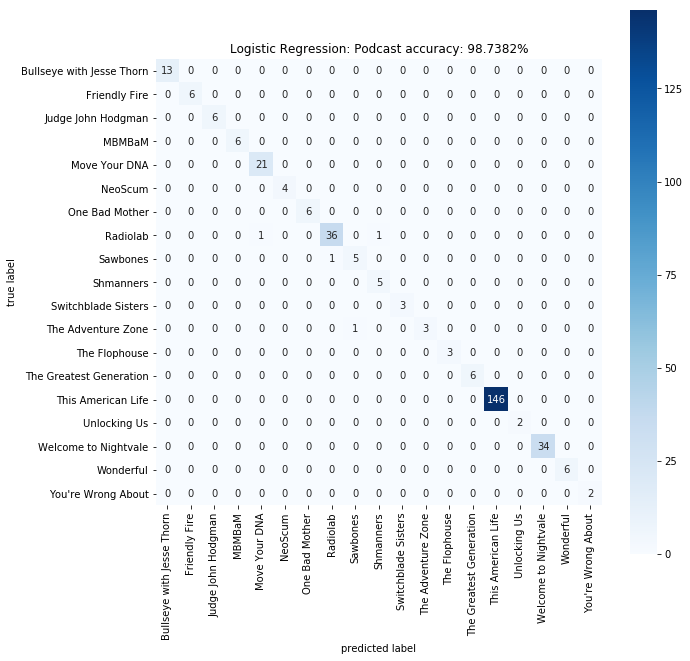

In [5]:
X = num_df.drop(['podcast'], axis=1)
y = target_df['podcast']

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

lr_model = LogisticRegression() # initialize model
lr_model.fit(X_train, y_train) # train model
y_pred = lr_model.predict(X_test) # save model predictions of test data
cm_labels = sorted(set(y.values))
plot_cm(y_test, y_pred, 'Logistic Regression: Podcast', cm_labels)

In [6]:
# Have to do a bit of extra cleaning to predict year - drop NaNs and empty strings
targnum_df = target_df.merge(num_df, how='inner')
clean_year = targnum_df.replace(r'^\s*$', np.nan, regex=True).dropna()
clean_year.columns


Index(['podcast', 'Hosts', 'Scripted/Un', 'Fiction/Non', 'Format', 'Rating',
       'Year', 'Tag1', 'Tag2', 'Token_count', 'Avg_token_len', 'Avg_sent_len',
       'TTR', 'Avg_kband', 'Noun_freq', 'Proper_noun_freq', 'Verb_freq',
       'Adj_freq', 'Adv_freq', 'Interjection_freq', 'Preposition_freq',
       'Conjunction_freq', 'Avg_noun_len', 'Avg_verb_len', 'Avg_adj_len',
       'Avg_adv_len', 'i_count', 'you_count', 'she_count', 'he_count',
       'it_count', 'they_count', 'we_count', 'Know', 'Be', 'Do', 'Mean',
       'Make', 'Go', 'Organization', 'Art', 'Date', 'Geopolitical', 'Numbers',
       'Event', 'Cash', 'Time', 'Product', 'period_freq', 'excl_freq',
       'quest_freq', 'hyph_freq', 'Tag_len', 'Swear_count', 'Fake_swear_count',
       'Opinion_count', 'Prep_per_sent', 'Donation_appeal', 'Social'],
      dtype='object')

### Test #2a: Using numerical features to predict year - Logistic

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

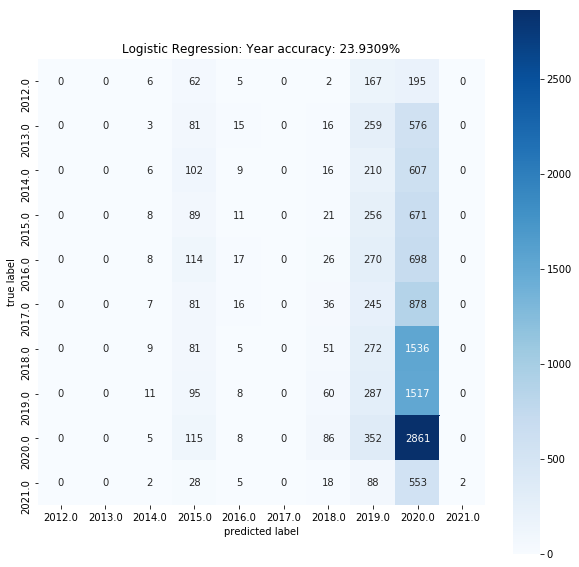

In [7]:
X = clean_year[['Token_count', 'Avg_token_len', 'Avg_sent_len',
       'TTR', 'Avg_kband', 'Noun_freq', 'Proper_noun_freq', 'Verb_freq',
       'Adj_freq', 'Adv_freq', 'Interjection_freq', 'Preposition_freq',
       'Conjunction_freq', 'Avg_noun_len', 'Avg_verb_len', 'Avg_adj_len',
       'Avg_adv_len', 'i_count', 'you_count', 'she_count', 'he_count',
       'it_count', 'they_count', 'we_count', 'Know', 'Be', 'Do', 'Mean',
       'Make', 'Go', 'Organization', 'Art', 'Date', 'Geopolitical', 'Numbers',
       'Event', 'Cash', 'Time', 'Product', 'period_freq', 'excl_freq',
       'quest_freq', 'hyph_freq', 'Tag_len', 'Swear_count', 'Fake_swear_count',
       'Opinion_count', 'Prep_per_sent', 'Donation_appeal', 'Social']]
y = clean_year['Year']

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)


lr_model = LogisticRegression() # initialize model
lr_model.fit(X_train, y_train) # train model
y_pred = lr_model.predict(X_test) # save model predictions of test data

plot_cm(y_test, y_pred, 'Logistic Regression: Year', sorted(set(y.values)))

### Test #2b: Using numerical features to predict year - Linear

In [8]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train) # train model
y_pred = regressor.predict(X_test) # save model predictions of test data

y_pred = [int(round(y, 0)) for y in y_pred]
y_test = [int(y) for y in y_test]

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

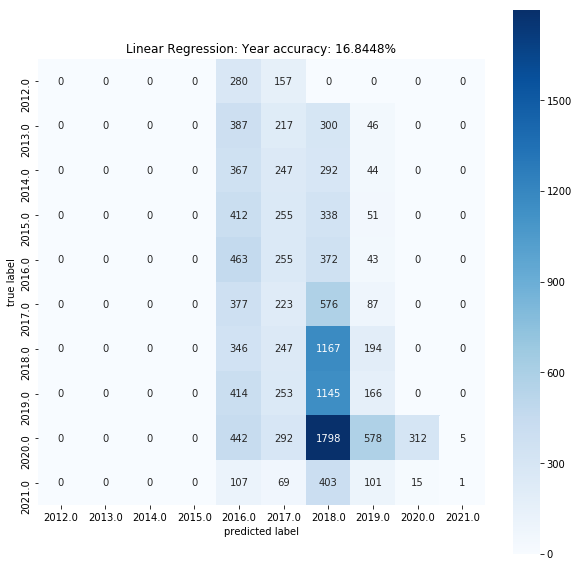

In [9]:
plot_cm(y_test, y_pred, 'Linear Regression: Year', sorted(set(y.values)))

No surprise here: almost all of the podcasts are from 2020.  Base rate = 39.4%.  If the model would've just guessed 2020 for all of them, it would have been more accurate.

In [10]:
target_df.Year.value_counts()
sum(target_df.Year.value_counts())

2020.0    205
2019.0     54
2018.0     53
2021.0     44
2017.0     35
2016.0     32
2015.0     30
2014.0     27
2013.0     27
2012.0     13
Name: Year, dtype: int64

520

### Test #3: Using numerical features to predict podcast format

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

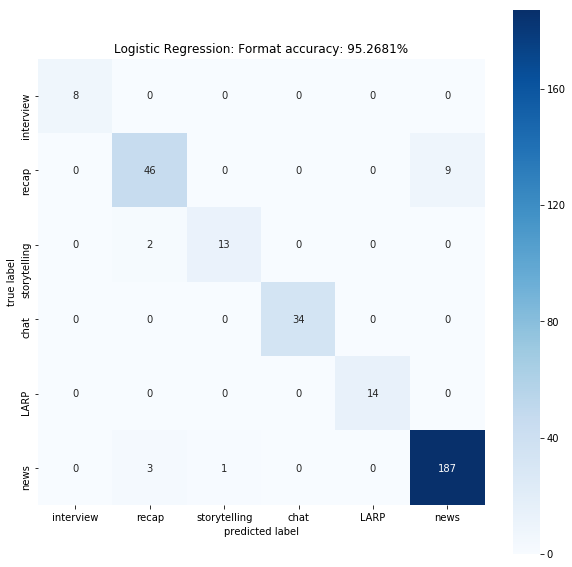

In [11]:

X = num_df.drop(['podcast'], axis=1)
y = target_df['Format']

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)


lr_model = LogisticRegression() # initialize model
lr_model.fit(X_train, y_train) # train model
y_pred = lr_model.predict(X_test) # save model predictions of test data

plot_cm(y_test, y_pred, 'Logistic Regression: Format', set(y.values))

### Test #4: Using numerical features to predict number of hosts/guests

In [12]:
# gonna need a function to round linear regression and get labels
def round_hosts(prediction):
    decimal = float(prediction) - float(int(prediction))
    if decimal < 0.25:
        prediction = float(int(prediction))
    elif decimal < 0.75:
        prediction = float(int(prediction)) + 0.5
    elif decimal >= 0.75:
        prediction = int(prediction) + 1
    
    return str(float(prediction))
        
round_hosts(5.832451)        

'6.0'

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

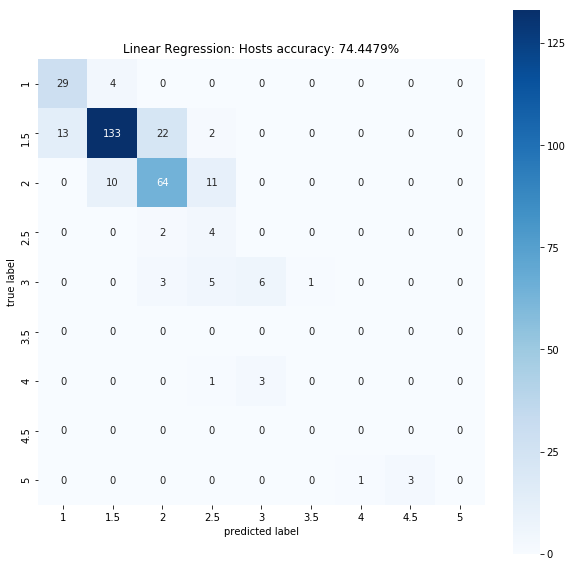

In [13]:
# use linear regression to predict hosts

X = num_df.drop(['podcast', 'Hosts'], axis=1)
y = target_df['Hosts']

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)


regressor = LinearRegression()
regressor.fit(X_train, y_train) # train model
y_pred = regressor.predict(X_test) # save model predictions of test data


y_rounded_pred = [round_hosts(x) for x in y_pred]
y_test_labels = [str(x) for x in y_test]

all_numbers = [float(x) for x in y_rounded_pred + y_test_labels]
all_numbers = sorted(list(set(all_numbers)))

plot_cm(y_test_labels, y_rounded_pred, 'Linear Regression: Hosts', [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])

In [14]:
target_df.Hosts.value_counts()
sum(target_df.Hosts.value_counts())

1.5    848
2.0    424
1.0    168
3.0     76
2.5     29
5.0     20
4.0     19
Name: Hosts, dtype: int64

1584

Base rate of 1.5 is 53%, so the model did better than it would have if it just guessed 1.5 for everything.

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

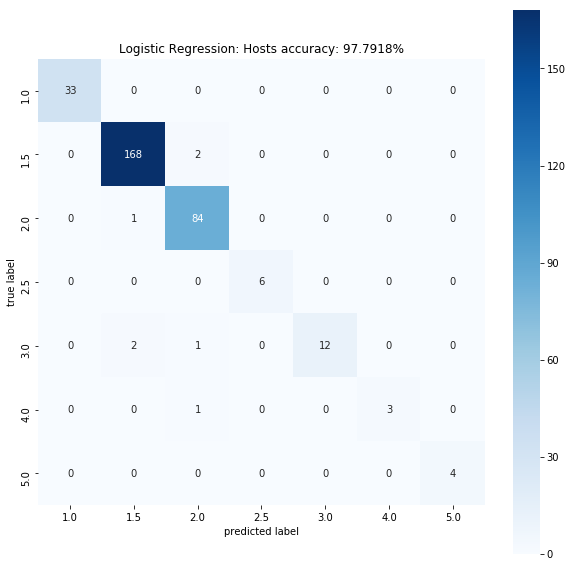

In [15]:
# use linear regression to predict hosts

X = num_df.drop(['podcast', 'Hosts'], axis=1)
target_df['Hosts_str'] = target_df.Hosts.map(str)
y = target_df.Hosts_str

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

lr_model.fit(X_train, y_train) # train model
y_pred = lr_model.predict(X_test) # save model predictions of test data


# y_rounded_pred = [round_hosts(x) for x in y_pred]
# y_test_labels = [str(x) for x in y_test]

# all_numbers = [float(x) for x in y_rounded_pred + y_test_labels]
# all_numbers = sorted(list(set(all_numbers)))

plot_cm(y_test, y_pred, 'Logistic Regression: Hosts', sorted(set(y_test)))

### Test #5: Using numerical data to predict rating

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

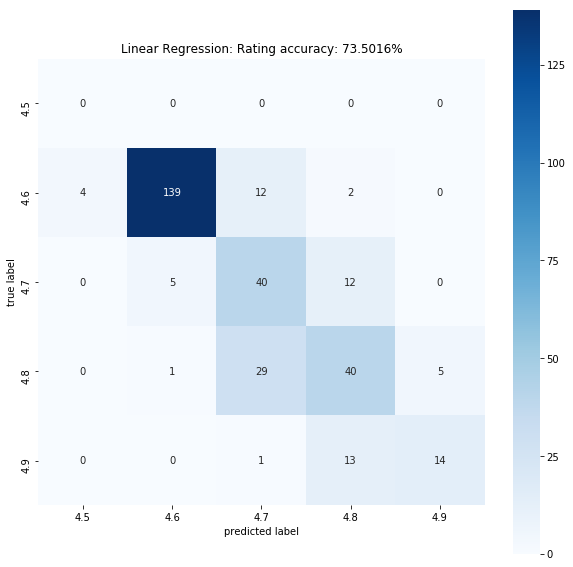

In [16]:
X = num_df.drop(['podcast', 'Rating'], axis=1)
y = target_df['Rating']

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)


regressor = LinearRegression()
regressor.fit(X_train, y_train) 
y_pred = regressor.predict(X_test)

y_pred_str = [str(round(y, 1)) for y in y_pred]
y_test_str = [str(y) for y in y_test]
all_ratings = sorted(list(set(y_pred_str + y_test_str)))

plot_cm(y_test_str, y_pred_str, 'Linear Regression: Rating', all_ratings)

In [17]:
target_df.Rating.value_counts()

4.6    784
4.8    374
4.7    284
4.9    142
Name: Rating, dtype: int64

### Tests #6: Weighing all numerical features against rating

### Test #7: Using numerical features to predict Tags

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

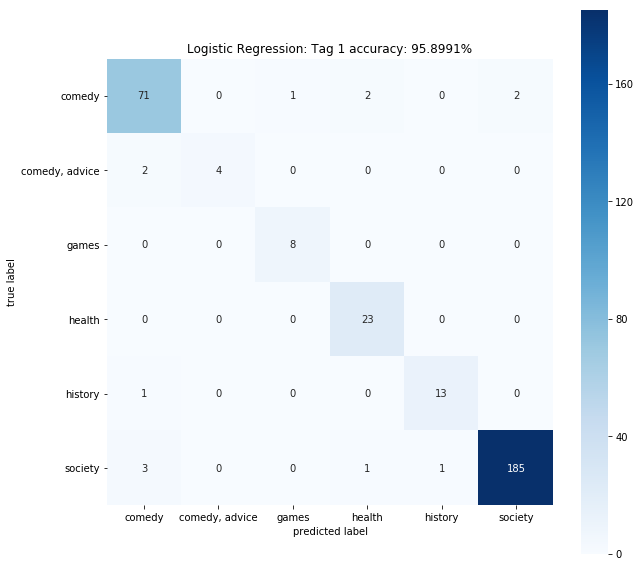

In [18]:
X = num_df.drop(['podcast'], axis=1)
y = target_df['Tag1']

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)


lr_model = LogisticRegression() # initialize model
lr_model.fit(X_train, y_train) # train model
y_pred = lr_model.predict(X_test) # save model predictions of test data

plot_cm(y_test, y_pred, 'Logistic Regression: Tag 1', sorted(set(y.values)))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

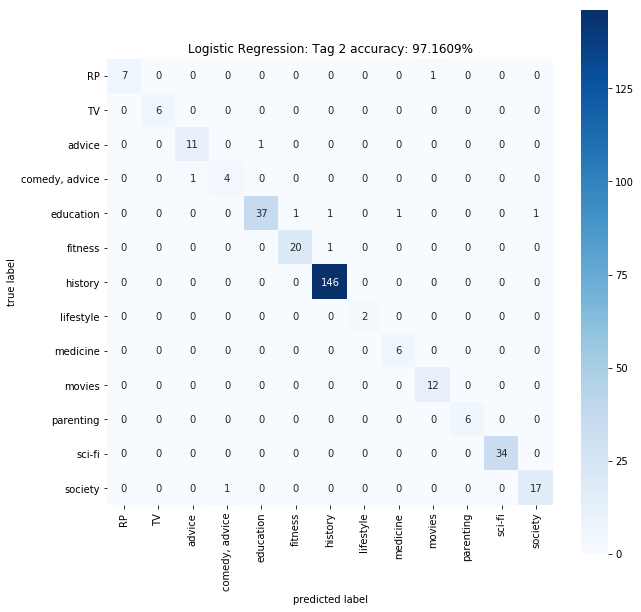

In [19]:
X = num_df.drop(['podcast'], axis=1)
y = target_df['Tag2']

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)


lr_model = LogisticRegression() # initialize model
lr_model.fit(X_train, y_train) # train model
y_pred = lr_model.predict(X_test) # save model predictions of test data

plot_cm(y_test, y_pred, 'Logistic Regression: Tag 2', sorted(set(y.values)))

In [20]:
sum(num_df.Token_count)

16650103

In [21]:
from collections import Counter

data = []

for p in Counter(target_df.podcast.values):
    current = []
    current.append(p)
    current.append(Counter(target_df.podcast.values)[p])
    data.append(current)
    
podcount_df = pd.DataFrame(data, columns=['Podcast','data']).set_index('Podcast')
podpos_df = podcount_df

    


Text(0.5,0,'Podcast')

Text(0,0.5,'Transcripts')

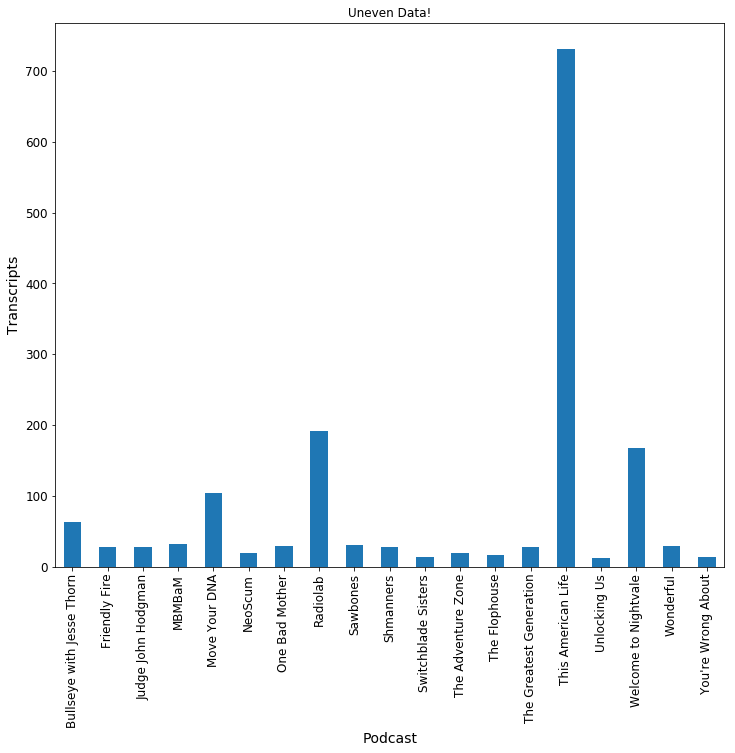

In [22]:
ax = podcount_df[[col for col in podcount_df]].plot(kind='bar', title ="Uneven Data!", legend=False, figsize=(12, 10), fontsize=12)

ax.set_xlabel('Podcast', size=14)
ax.set_ylabel('Transcripts', size=14)
plt.show()

In [23]:
target_df.Year.value_counts()

2020.0    205
2019.0     54
2018.0     53
2021.0     44
2017.0     35
2016.0     32
2015.0     30
2014.0     27
2013.0     27
2012.0     13
Name: Year, dtype: int64

### Find if ANYTHING correlates to rating

Text(0.5,0,'Hosts')

Text(0,0.5,'Rating')

Text(0.5,1,'Hosts')

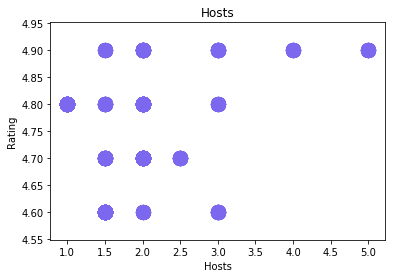

0.3805526987481454


Text(0.5,0,'Rating')

Text(0,0.5,'Rating')

Text(0.5,1,'Rating')

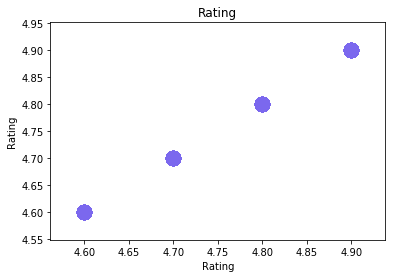

1.0


Text(0.5,0,'Token_count')

Text(0,0.5,'Rating')

Text(0.5,1,'Token_count')

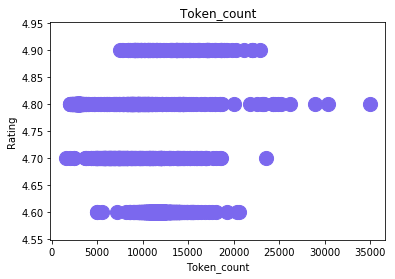

-0.19783745315947673


Text(0.5,0,'Avg_token_len')

Text(0,0.5,'Rating')

Text(0.5,1,'Avg_token_len')

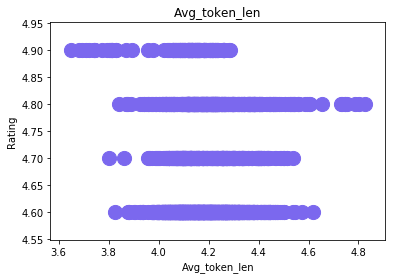

-0.03166591254783857


Text(0.5,0,'Avg_sent_len')

Text(0,0.5,'Rating')

Text(0.5,1,'Avg_sent_len')

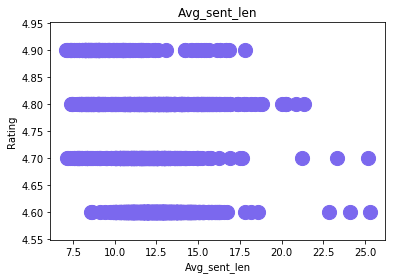

-0.22853101697048142


Text(0.5,0,'TTR')

Text(0,0.5,'Rating')

Text(0.5,1,'TTR')

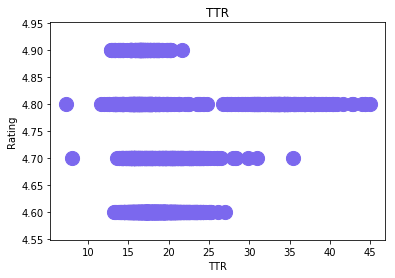

0.22198023803052258


Text(0.5,0,'Avg_kband')

Text(0,0.5,'Rating')

Text(0.5,1,'Avg_kband')

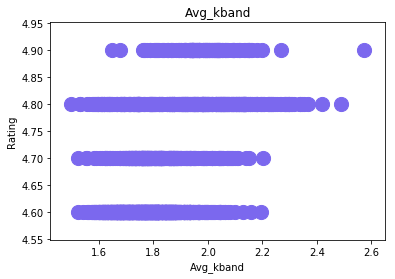

0.4752878027684504


Text(0.5,0,'Noun_freq')

Text(0,0.5,'Rating')

Text(0.5,1,'Noun_freq')

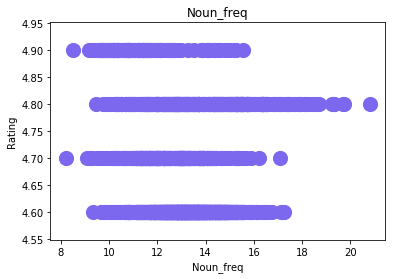

-0.09339311394266898


Text(0.5,0,'Proper_noun_freq')

Text(0,0.5,'Rating')

Text(0.5,1,'Proper_noun_freq')

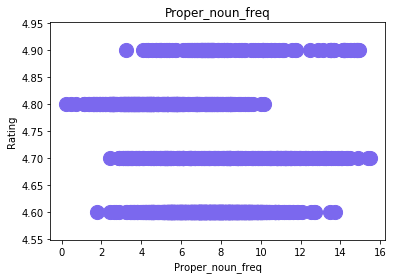

-0.13935817567961536


Text(0.5,0,'Verb_freq')

Text(0,0.5,'Rating')

Text(0.5,1,'Verb_freq')

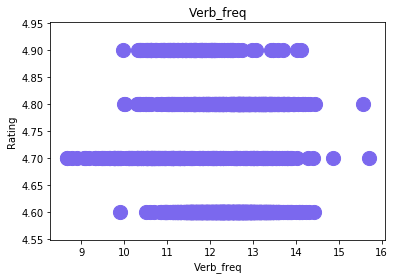

-0.11928974572785145


Text(0.5,0,'Adj_freq')

Text(0,0.5,'Rating')

Text(0.5,1,'Adj_freq')

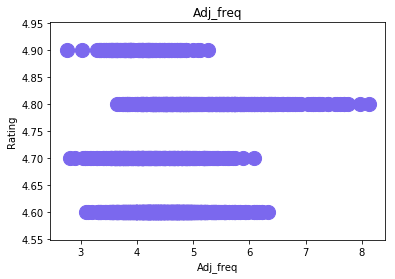

0.13446808325610454


Text(0.5,0,'Adv_freq')

Text(0,0.5,'Rating')

Text(0.5,1,'Adv_freq')

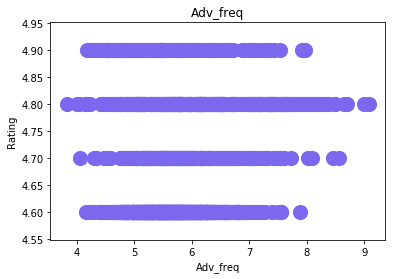

0.15693614212432747


Text(0.5,0,'Interjection_freq')

Text(0,0.5,'Rating')

Text(0.5,1,'Interjection_freq')

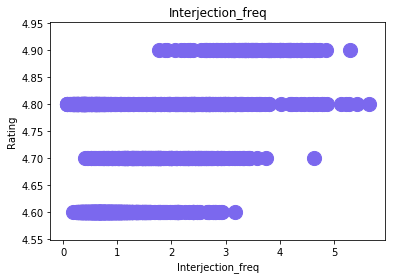

0.6037818414170385


Text(0.5,0,'Preposition_freq')

Text(0,0.5,'Rating')

Text(0.5,1,'Preposition_freq')

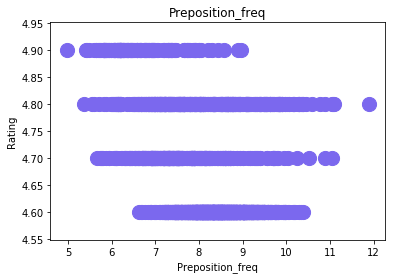

-0.4021615979195822


Text(0.5,0,'Conjunction_freq')

Text(0,0.5,'Rating')

Text(0.5,1,'Conjunction_freq')

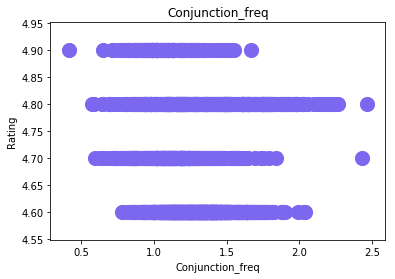

-0.08050879441840404


Text(0.5,0,'Avg_noun_len')

Text(0,0.5,'Rating')

Text(0.5,1,'Avg_noun_len')

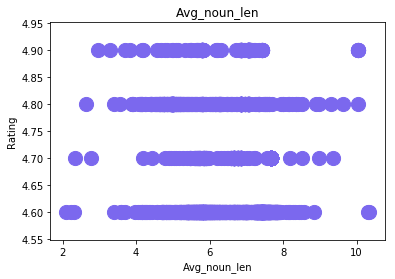

-0.13082202930709264


Text(0.5,0,'Avg_verb_len')

Text(0,0.5,'Rating')

Text(0.5,1,'Avg_verb_len')

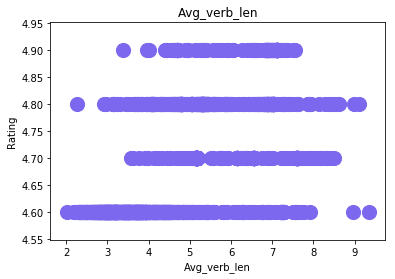

0.5773023198511662


Text(0.5,0,'Avg_adj_len')

Text(0,0.5,'Rating')

Text(0.5,1,'Avg_adj_len')

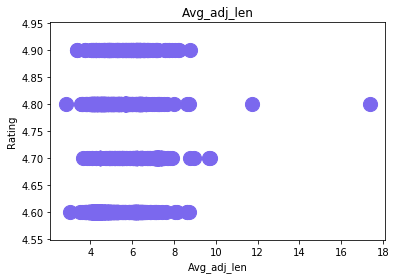

0.2907510523188555


Text(0.5,0,'Avg_adv_len')

Text(0,0.5,'Rating')

Text(0.5,1,'Avg_adv_len')

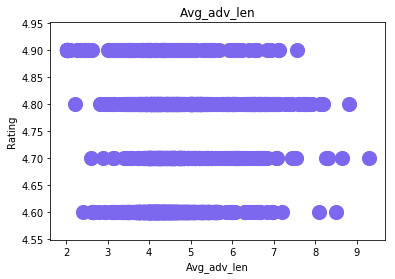

0.08606552289804303


Text(0.5,0,'you_count')

Text(0,0.5,'Rating')

Text(0.5,1,'you_count')

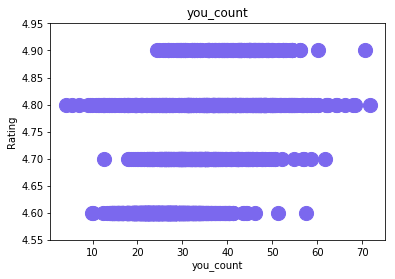

0.5497759865654077


Text(0.5,0,'she_count')

Text(0,0.5,'Rating')

Text(0.5,1,'she_count')

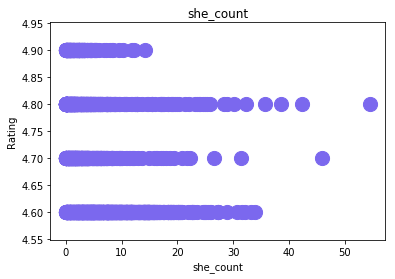

-0.27319628404251306


Text(0.5,0,'he_count')

Text(0,0.5,'Rating')

Text(0.5,1,'he_count')

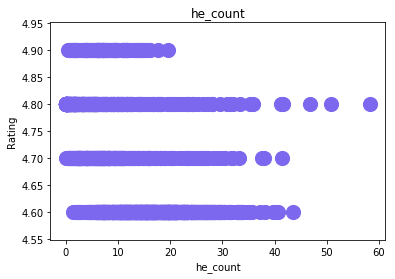

-0.4554496924731266


Text(0.5,0,'it_count')

Text(0,0.5,'Rating')

Text(0.5,1,'it_count')

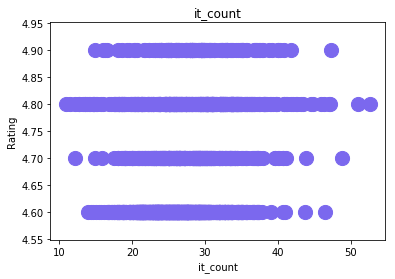

0.18095963865647402


Text(0.5,0,'they_count')

Text(0,0.5,'Rating')

Text(0.5,1,'they_count')

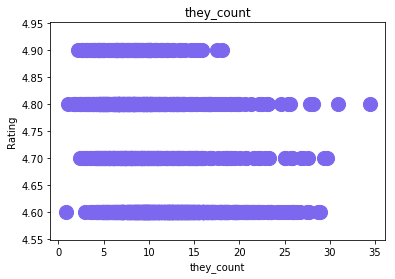

-0.28932521708387343


Text(0.5,0,'we_count')

Text(0,0.5,'Rating')

Text(0.5,1,'we_count')

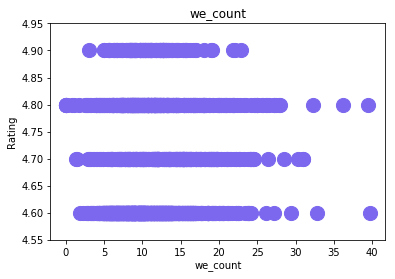

0.07489068271223011


Text(0.5,0,'Know')

Text(0,0.5,'Rating')

Text(0.5,1,'Know')

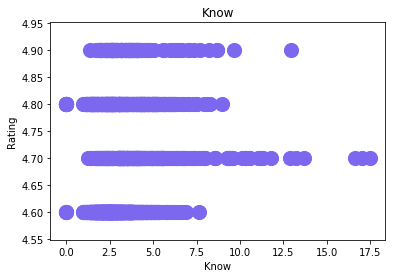

0.18790433694543404


Text(0.5,0,'Be')

Text(0,0.5,'Rating')

Text(0.5,1,'Be')

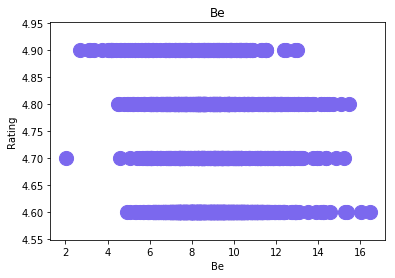

-0.08044153281439309


Text(0.5,0,'Do')

Text(0,0.5,'Rating')

Text(0.5,1,'Do')

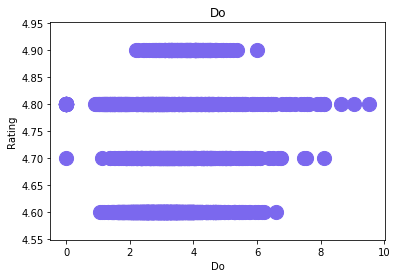

0.12697531496842238


Text(0.5,0,'Mean')

Text(0,0.5,'Rating')

Text(0.5,1,'Mean')

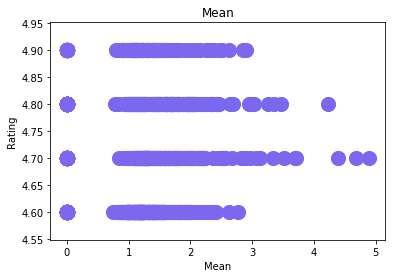

0.2099089789973223


Text(0.5,0,'Make')

Text(0,0.5,'Rating')

Text(0.5,1,'Make')

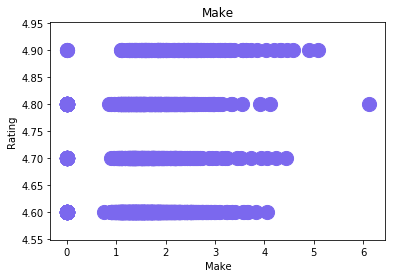

0.14233325682798642


Text(0.5,0,'Go')

Text(0,0.5,'Rating')

Text(0.5,1,'Go')

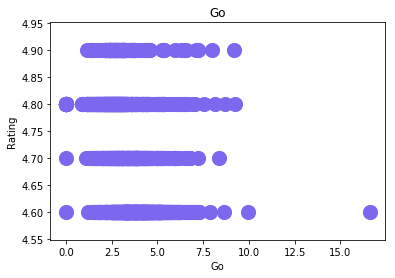

-0.30285707417959806


Text(0.5,0,'Organization')

Text(0,0.5,'Rating')

Text(0.5,1,'Organization')

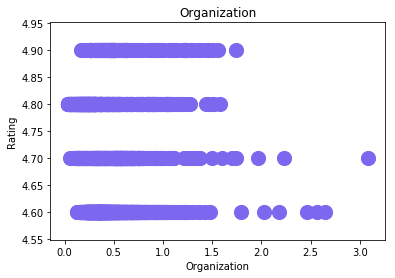

0.06671272183768466


Text(0.5,0,'Art')

Text(0,0.5,'Rating')

Text(0.5,1,'Art')

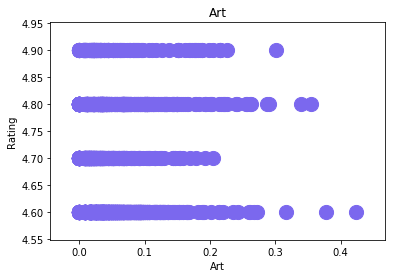

0.05967740306182669


Text(0.5,0,'Date')

Text(0,0.5,'Rating')

Text(0.5,1,'Date')

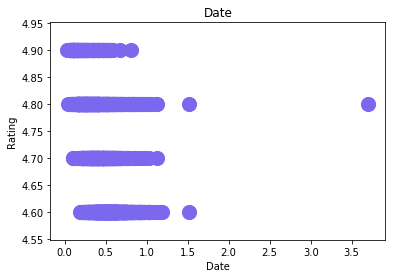

-0.4243330363243656


Text(0.5,0,'Geopolitical')

Text(0,0.5,'Rating')

Text(0.5,1,'Geopolitical')

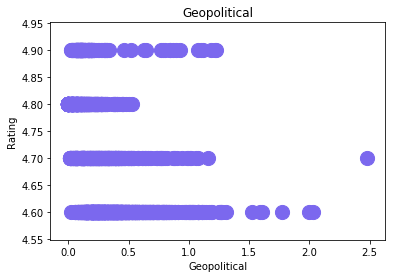

-0.4006190171502766


Text(0.5,0,'Numbers')

Text(0,0.5,'Rating')

Text(0.5,1,'Numbers')

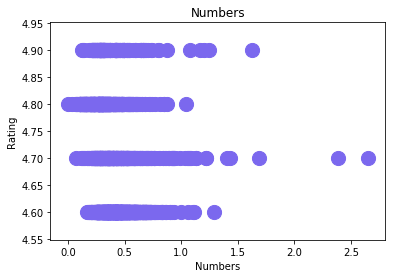

-0.19234125100451432


Text(0.5,0,'Event')

Text(0,0.5,'Rating')

Text(0.5,1,'Event')

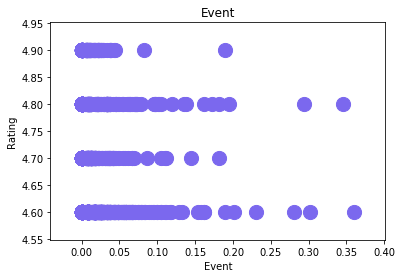

-0.05168172073244958


Text(0.5,0,'Cash')

Text(0,0.5,'Rating')

Text(0.5,1,'Cash')

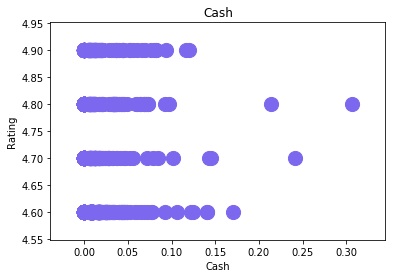

0.09754404629731135


Text(0.5,0,'Time')

Text(0,0.5,'Rating')

Text(0.5,1,'Time')

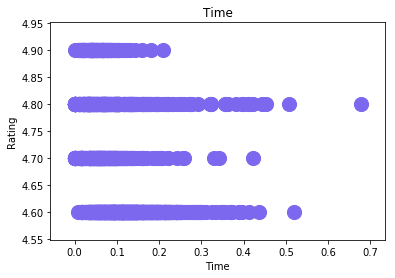

-0.29462709798127695


Text(0.5,0,'Product')

Text(0,0.5,'Rating')

Text(0.5,1,'Product')

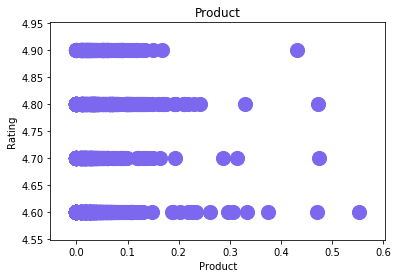

0.1821184336388033


Text(0.5,0,'period_freq')

Text(0,0.5,'Rating')

Text(0.5,1,'period_freq')

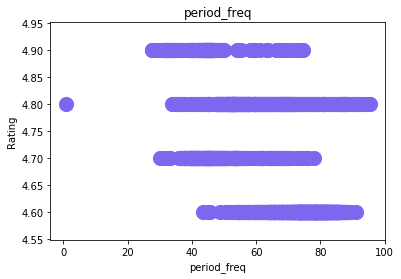

-0.5738783991680854


Text(0.5,0,'excl_freq')

Text(0,0.5,'Rating')

Text(0.5,1,'excl_freq')

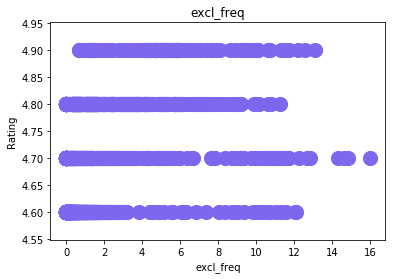

0.4806395172181135


Text(0.5,0,'quest_freq')

Text(0,0.5,'Rating')

Text(0.5,1,'quest_freq')

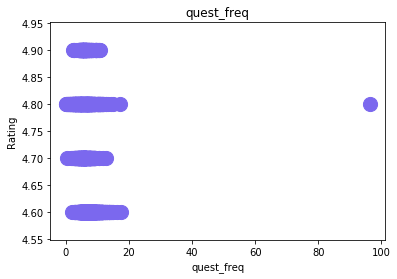

-0.17528815064076778


Text(0.5,0,'hyph_freq')

Text(0,0.5,'Rating')

Text(0.5,1,'hyph_freq')

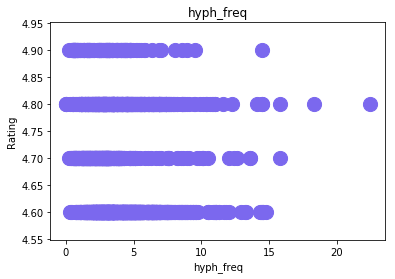

-0.09236564941784524


Text(0.5,0,'Tag_len')

Text(0,0.5,'Rating')

Text(0.5,1,'Tag_len')

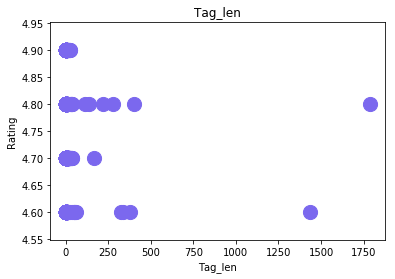

0.009080876819209108


Text(0.5,0,'Swear_count')

Text(0,0.5,'Rating')

Text(0.5,1,'Swear_count')

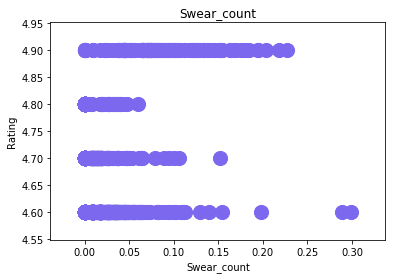

0.28686138575950004


Text(0.5,0,'Fake_swear_count')

Text(0,0.5,'Rating')

Text(0.5,1,'Fake_swear_count')

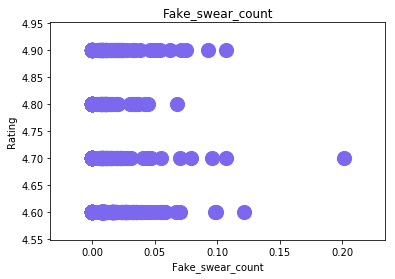

0.006430831659408056


Text(0.5,0,'Opinion_count')

Text(0,0.5,'Rating')

Text(0.5,1,'Opinion_count')

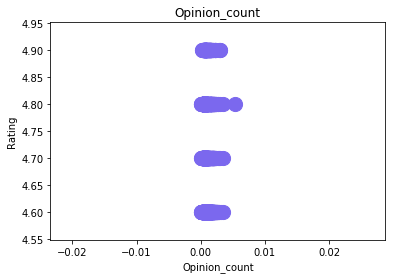

-0.017510522483114292


Text(0.5,0,'Prep_per_sent')

Text(0,0.5,'Rating')

Text(0.5,1,'Prep_per_sent')

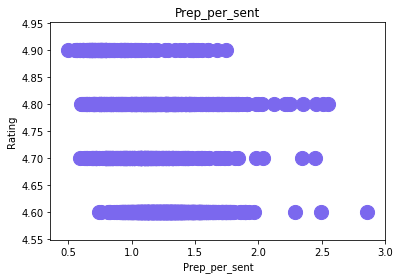

-0.2916585852979013


Text(0.5,0,'Donation_appeal')

Text(0,0.5,'Rating')

Text(0.5,1,'Donation_appeal')

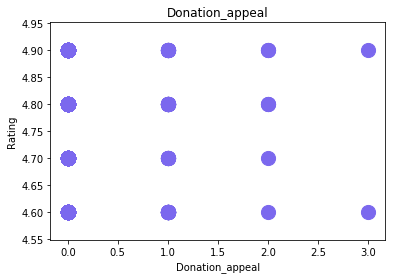

0.08846288108224869


Text(0.5,0,'Social')

Text(0,0.5,'Rating')

Text(0.5,1,'Social')

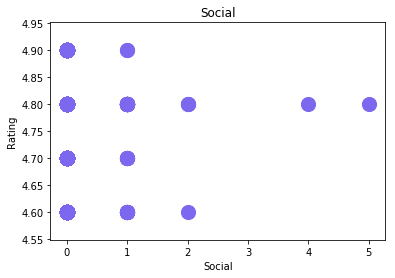

0.08577884002371154


In [30]:
y = target_df['Rating']
for c in num_df.columns:
    if isinstance(num_df.loc[0, c], str):
        continue
    if c=='i_count':
        continue
    x = num_df[c]
    r =np.corrcoef(x, y)
    plt.scatter(x, y, s=200, c='mediumslateblue')
    plt.xlabel(c)
    plt.ylabel('Rating')
    save_path = '../figures/non-lexical_features/rating_correlation/' + c +'.pdf'
    plt.savefig(save_path)
    plt.title(c)
    plt.show()
    

    print(r[0][1])
        


In [31]:
x = num_df['excl_freq']
y = target_df['Rating']

In [32]:
r = np.corrcoef(x, y)

In [33]:
r

array([[1.        , 0.48063952],
       [0.48063952, 1.        ]])

In [28]:
len(num_df.columns)
num_df.columns

53

Index(['podcast', 'Hosts', 'Rating', 'Token_count', 'Avg_token_len',
       'Avg_sent_len', 'TTR', 'Avg_kband', 'Noun_freq', 'Proper_noun_freq',
       'Verb_freq', 'Adj_freq', 'Adv_freq', 'Interjection_freq',
       'Preposition_freq', 'Conjunction_freq', 'Avg_noun_len', 'Avg_verb_len',
       'Avg_adj_len', 'Avg_adv_len', 'i_count', 'you_count', 'she_count',
       'he_count', 'it_count', 'they_count', 'we_count', 'Know', 'Be', 'Do',
       'Mean', 'Make', 'Go', 'Organization', 'Art', 'Date', 'Geopolitical',
       'Numbers', 'Event', 'Cash', 'Time', 'Product', 'period_freq',
       'excl_freq', 'quest_freq', 'hyph_freq', 'Tag_len', 'Swear_count',
       'Fake_swear_count', 'Opinion_count', 'Prep_per_sent', 'Donation_appeal',
       'Social'],
      dtype='object')